In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

y_train, y_test = y_train.flatten(),y_test.flatten()
print("x_train.shape:" , x_train.shape)
print("y_train.shape:" , y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [3]:
K= len(set(y_train)) # number of classes
K

10

## Building the model using the functional API

In [4]:
i = Input (shape =x_train[0].shape)
x= Conv2D(32, (3,3), strides =2, activation= 'relu')(i)
x= Conv2D(64, (3,3), strides =2, activation= 'relu')(x)
x= Conv2D(128, (3,3), strides =2, activation= 'relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x= Dropout(0.2)(x)
x= Dense(K, activation='softmax')(x)

model = Model(i,x)


In [5]:
#Compile and fit
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics =['accuracy'])
mdl = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 34s 21ms/step - loss: 1.5703 - accuracy: 0.4285 - val_loss: 1.3483 - val_accuracy: 0.5085
Epoch 2/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2781 - accuracy: 0.5408 - val_loss: 1.1312 - val_accuracy: 0.5877
Epoch 3/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1522 - accuracy: 0.5904 - val_loss: 1.0207 - val_accuracy: 0.6380
Epoch 4/15
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0620 - accuracy: 0.6198 - val_loss: 0.9880 - val_accuracy: 0.6466
Epoch 5/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9995 - accuracy: 0.6454 - val_loss: 0.9438 - val_accuracy: 0.6726
Epoch 6/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9333 - accuracy: 0.6698 - val_loss: 0.9121 - val_accuracy: 0.6817
Epoch 7/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8831 - accuracy: 0.6851 - val_loss: 0.8682 -

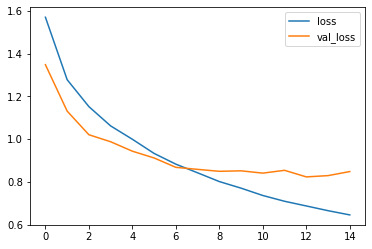

In [6]:
#Loss per iteration
plt.plot(mdl.history['loss'],label='loss')
plt.plot(mdl.history['val_loss'], label= 'val_loss')
plt.legend()

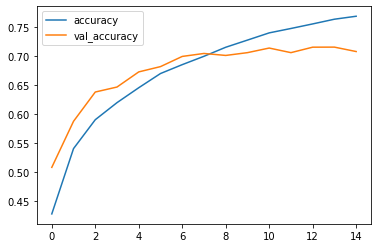

In [7]:
#Accuracy per iteration
plt.plot(mdl.history['accuracy'],label='accuracy')
plt.plot(mdl.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

In [8]:
ptest= model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,ptest)
print(cm)

[[799  42  29  13  17   2  17  12  44  25]
 [  9 895   4   7   3   4  12   3   7  56]
 [ 83   8 517  47 105  81 107  38   9   5]
 [ 25  11  52 448  64 179 163  31  12  15]
 [ 22   5  49  38 638  47 108  81  11   1]
 [ 10   6  38 140  45 612  81  58   2   8]
 [  4   8  26  25  16  13 896   5   3   4]
 [ 15   5  24  23  56  66  21 780   4   6]
 [ 96  70  12  14  12   6  11   7 743  29]
 [ 43 125  13  13   3   5  14  19  17 748]]


In [10]:
df= pd.DataFrame(y_test, columns=['y_Actual'])
df1= pd.DataFrame(ptest, columns=['y_predicted'])
df['y_predicted']= df1['y_predicted']
df.head()

,y_Actual,y_predicted
0,3,3
1,8,8
2,8,8
3,0,0
4,6,6


In [17]:
model.save("CIFAR_10")

INFO:tensorflow:Assets written to: CIFAR_10\assets
